In [1]:
#installling scikit learn
!pip install scikit-learn

In [2]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from kmodes.kmodes import KModes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [3]:
#reading in the data table, dropping extra column, and NaN values, adding Profit
#https://www.kaggle.com/datasets/thedevastator/analyzing-customer-spending-habits-to-improve-sa

df = pd.read_csv('/Users/akanksharoy/Downloads/data.csv')
df = df.drop(['Column1','index','Date','Year'], axis=1).dropna()
df.rename(columns={"Customer Age": "Age", "Customer Gender": "Gender","Product Category":"Product_Category",\
                  "Sub Category":"Sub_Category","Unit Cost":"Unit_Cost","Unit Price":"Unit_Price"},inplace=True)
df["Profit"] = df["Revenue"]-df["Cost"]
df.head()

Month   Age Gender        Country       State Product_Category  \
0  February  29.0      F  United States  Washington      Accessories   
1  February  29.0      F  United States  Washington         Clothing   
2  February  29.0      F  United States  Washington      Accessories   
3     March  29.0      F  United States  Washington      Accessories   
4     March  29.0      F  United States  Washington      Accessories   

      Sub_Category  Quantity  Unit_Cost  Unit_Price   Cost  Revenue  Profit  
0  Tires and Tubes       1.0      80.00  109.000000   80.0    109.0    29.0  
1           Gloves       2.0      24.50   28.500000   49.0     57.0     8.0  
2  Tires and Tubes       3.0       3.67    5.000000   11.0     15.0     4.0  
3  Tires and Tubes       2.0      87.50  116.500000  175.0    233.0    58.0  
4  Tires and Tubes       3.0      35.00   41.666667  105.0    125.0    20.0

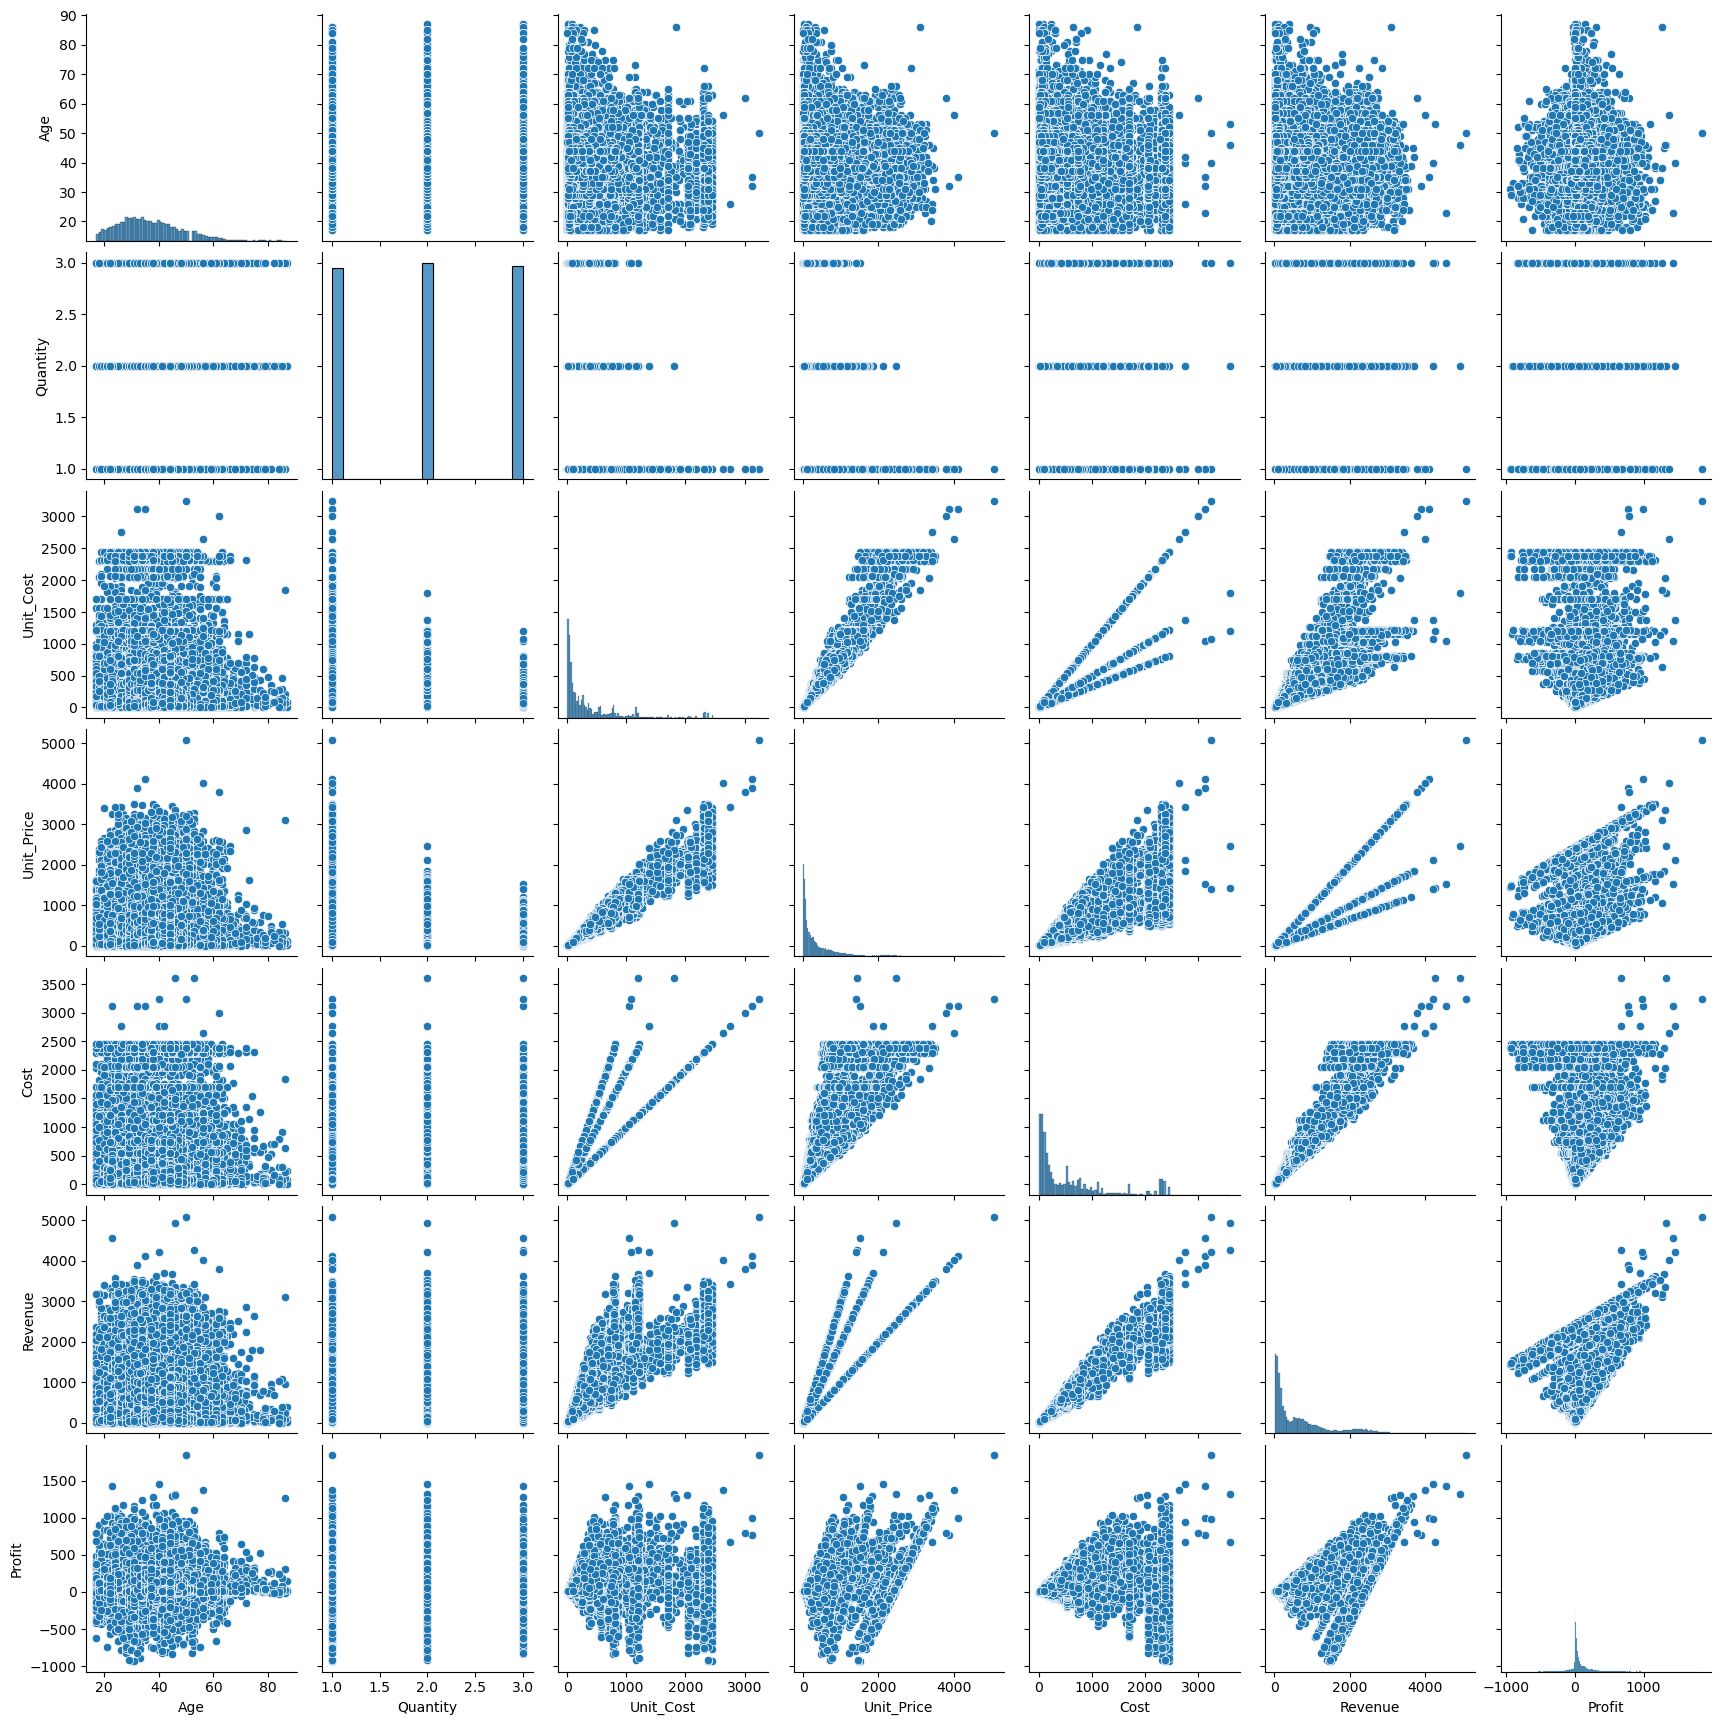

In [4]:
#creating line plots of all the numerical data in the table
#https://medium.com/analytics-vidhya/linear-regression-using-pandas-numpy-for-beginners-in-data-science-fe57157ed93d

sns.pairplot(data=df)

In [5]:
#creating a table with all the numerical data, and describing it

df_num = df[["Age", "Quantity","Unit_Cost","Unit_Price","Cost","Revenue","Profit"]]
numerical_stats = df_num.describe()
print(numerical_stats)

                Age      Quantity     Unit_Cost    Unit_Price          Cost  \
count  34866.000000  34866.000000  34866.000000  34866.000000  34866.000000   
mean      36.382895      2.002524    349.880567    389.232485    576.004532   
std       11.112902      0.813936    490.015846    525.319091    690.500395   
min       17.000000      1.000000      0.670000      0.666667      2.000000   
25%       28.000000      1.000000     45.000000     53.666667     85.000000   
50%       35.000000      2.000000    150.000000    179.000000    261.000000   
75%       44.000000      3.000000    455.000000    521.000000    769.000000   
max       87.000000      3.000000   3240.000000   5082.000000   3600.000000   

            Revenue        Profit  
count  34866.000000  34866.000000  
mean     640.870074     64.865542  
std      736.650597    152.879908  
min        2.000000   -937.000000  
25%      102.000000      5.000000  
50%      319.000000     27.000000  
75%      902.000000     96.000000  


In [6]:
#creating a table with all the categorical data, and describing it

df_cat = df[["Month","Gender","Country","State","Product_Category","Sub_Category"]]
categorical_stats = df_cat.describe()
print(categorical_stats)
df_cat.head()

        Month Gender        Country       State Product_Category  \
count   34866  34866          34866       34866            34866   
unique     12      2              4          45                3   
top      June      M  United States  California      Accessories   
freq     3680  17805          18076       10332            22534   

           Sub_Category  
count             34866  
unique               17  
top     Tires and Tubes  
freq              11112  


Month Gender        Country       State Product_Category  \
0  February      F  United States  Washington      Accessories   
1  February      F  United States  Washington         Clothing   
2  February      F  United States  Washington      Accessories   
3     March      F  United States  Washington      Accessories   
4     March      F  United States  Washington      Accessories   

      Sub_Category  
0  Tires and Tubes  
1           Gloves  
2  Tires and Tubes  
3  Tires and Tubes  
4  Tires and Tubes

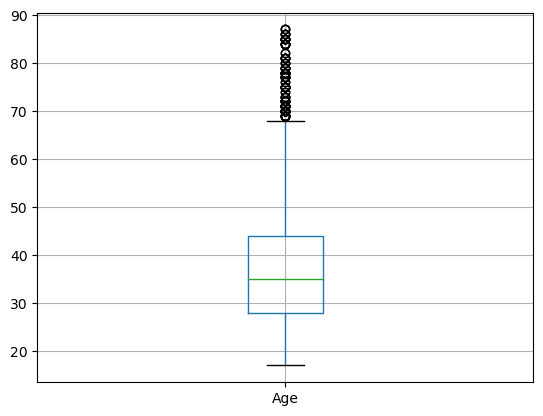

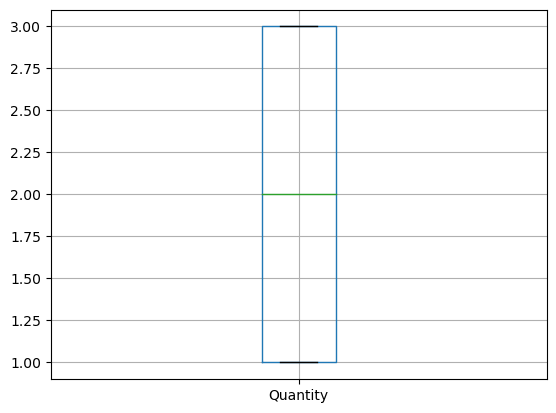

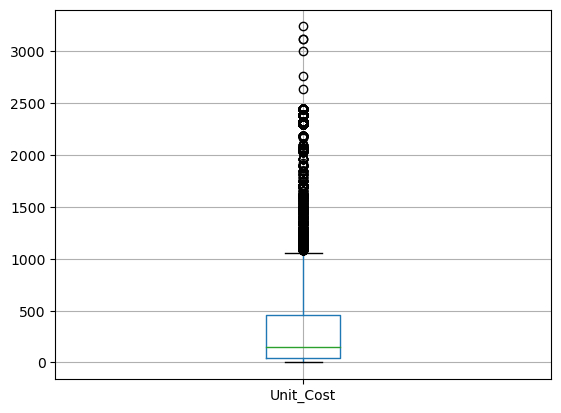

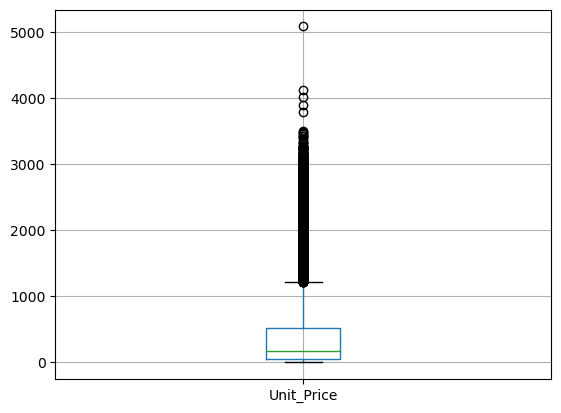

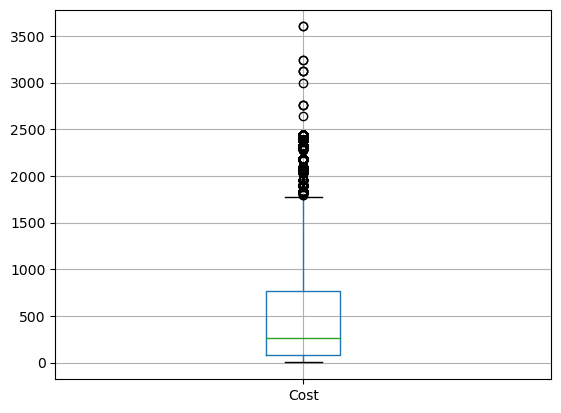

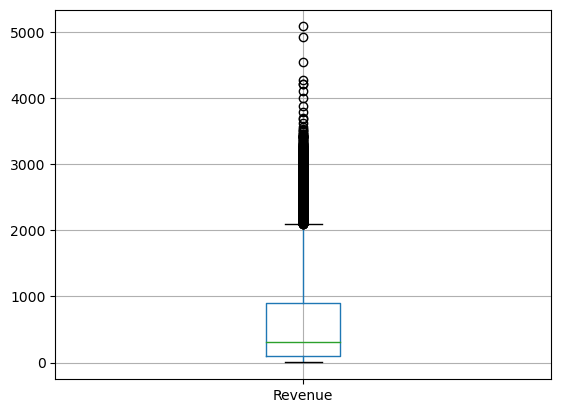

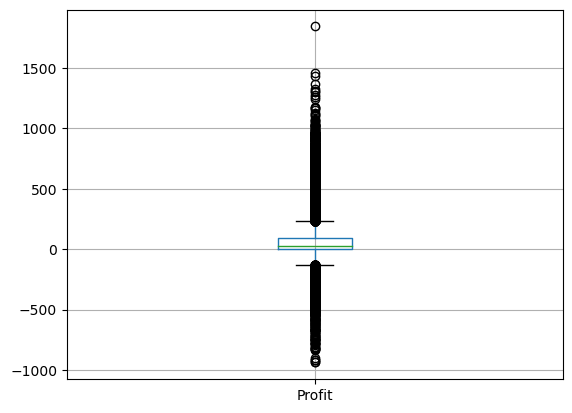

In [7]:
#boxplot of numerical data

for col in df_num:
    boxplot = df_num.boxplot(column=col)
    plt.show()

/var/folders/dt/mfk7l6kj25l9zm6v998pp24m0000gn/T/ipykernel_56452/3059592923.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.loc[df_num[col] < tenth, col] = tenth
/var/folders/dt/mfk7l6kj25l9zm6v998pp24m0000gn/T/ipykernel_56452/3059592923.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.loc[df_num[col] > nineth, col] = nineth


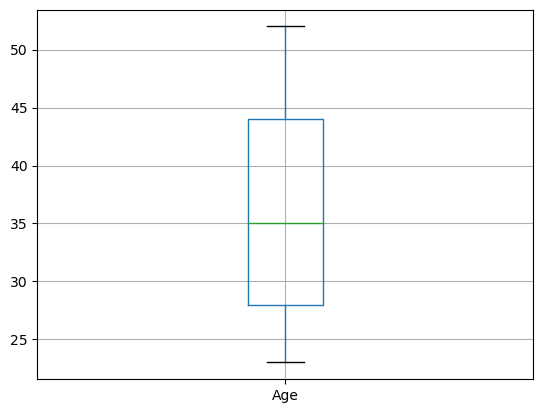

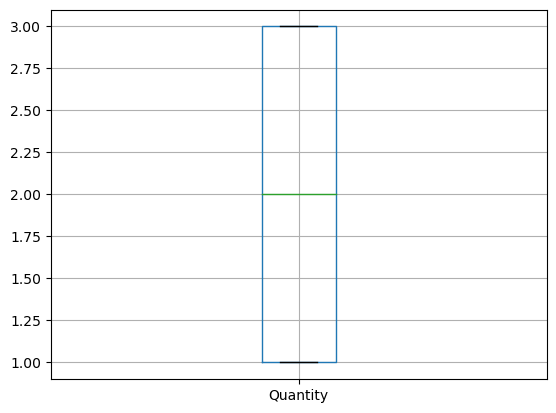

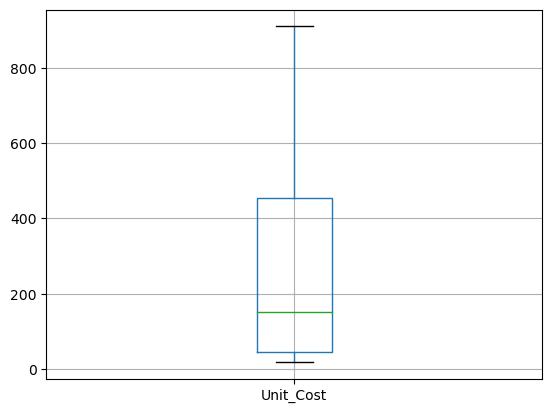

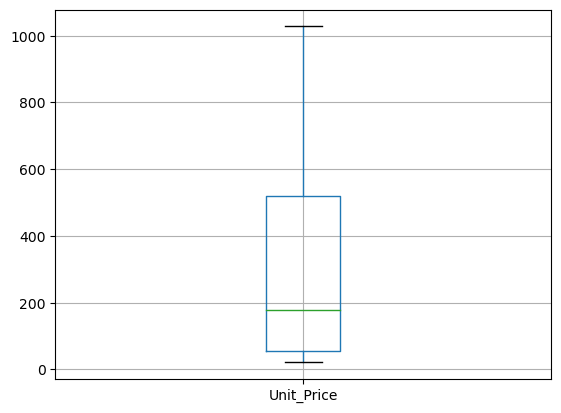

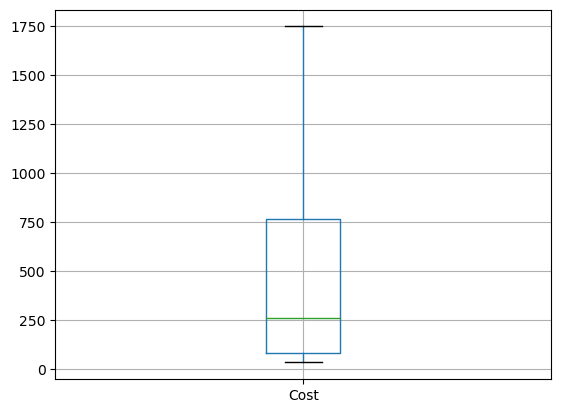

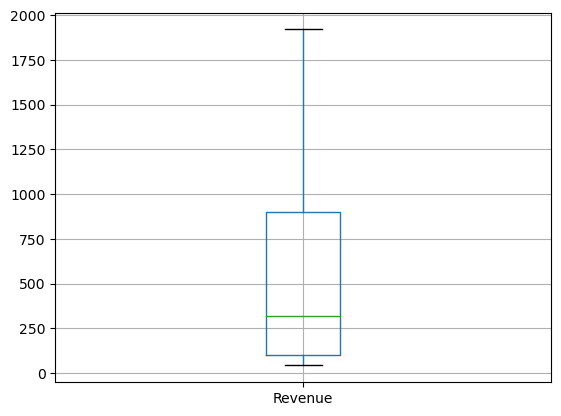

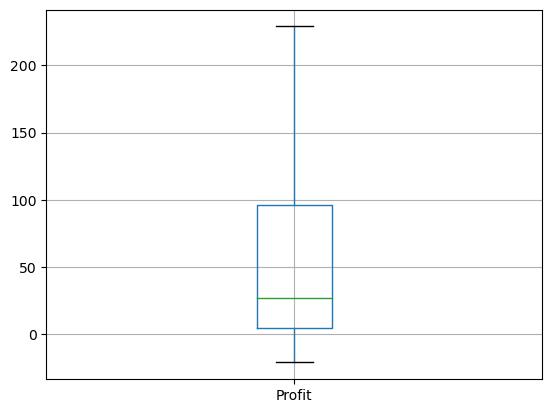

In [8]:
# Computing 10th, 90th percentiles and replacing the outliers for all the numerical data
#Recreating the boxplots from above
#https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/#4dee

percentiles = pd.DataFrame()
ten_percentiles = {}
ninety_percentiles = {}
for col in list(df_num):
    ten_percentiles[col] = np.percentile(df_num.loc[:,col],10,axis=0)
    ninety_percentiles[col] = np.percentile(df_num.loc[:,col],90,axis=0)
    percentiles[col] = [ten_percentiles[col],ninety_percentiles[col]]

percentiles.head()

for col in list(df_num):
    tenth = percentiles[col].loc[percentiles.index[0]]
    nineth = percentiles[col].loc[percentiles.index[1]]
    vals = list(df_num.loc[:,col])
    for val in vals:
        df_num.loc[df_num[col] < tenth, col] = tenth
        df_num.loc[df_num[col] > nineth, col] = nineth
        
for col in df_num:
    boxplot = df_num.boxplot(column=col)
    plt.show()

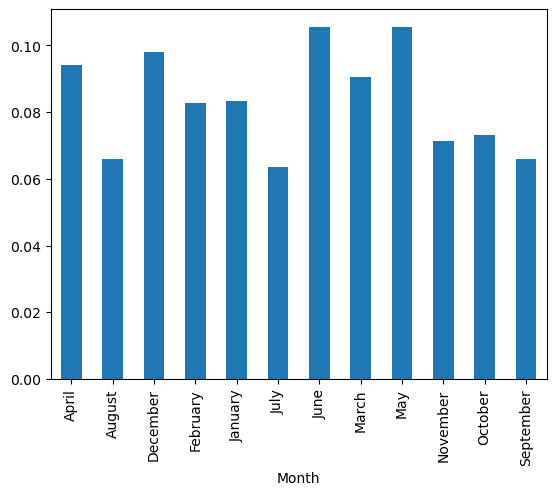

In [9]:
#Visualizing the frequency of Month
#https://www.kaggle.com/code/bhavikapanara/frequency-encoding

copy = df_cat.copy()

fq = (copy.groupby("Month").size()) / len(copy)
copy["Month encode"] = copy["Month"].apply(lambda x : fq[x])
copy = copy.drop(['Month'], axis=1)
fq.plot.bar(stacked=True)
plt.show()

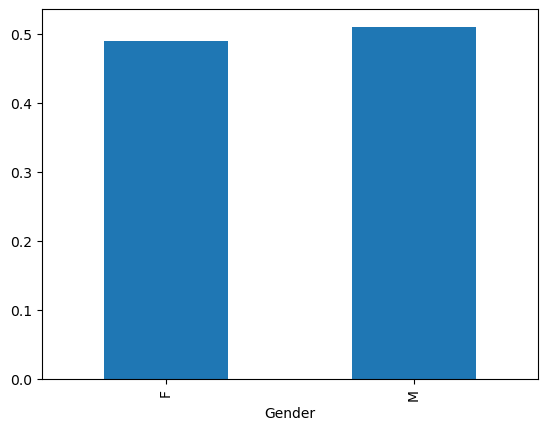

In [10]:
#Visualizing the frequency of Customer Gender

copy = df_cat.copy()

fq = (copy.groupby("Gender").size()) / len(copy)
copy["Gender encode"] = copy["Gender"].apply(lambda x : fq[x])
copy = copy.drop(['Gender'], axis=1)
fq.plot.bar(stacked=True)
plt.show()

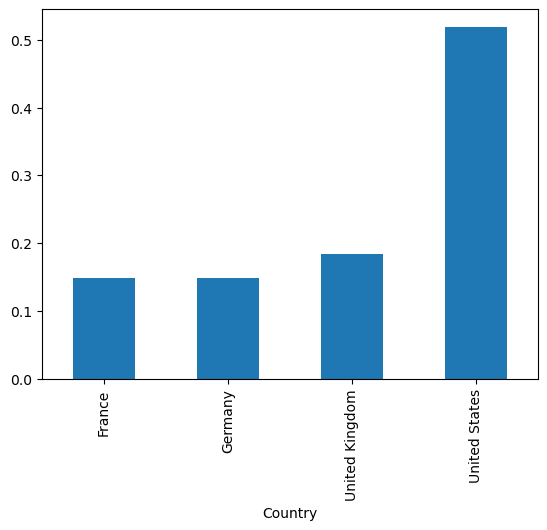

In [11]:
#Visualizing the frequency of Country

copy = df_cat.copy()

fq = (copy.groupby("Country").size()) / len(copy)
copy["Country encode"] = copy["Country"].apply(lambda x : fq[x])
copy = copy.drop(['Country'], axis=1)
fq.plot.bar(stacked=True)
plt.show()

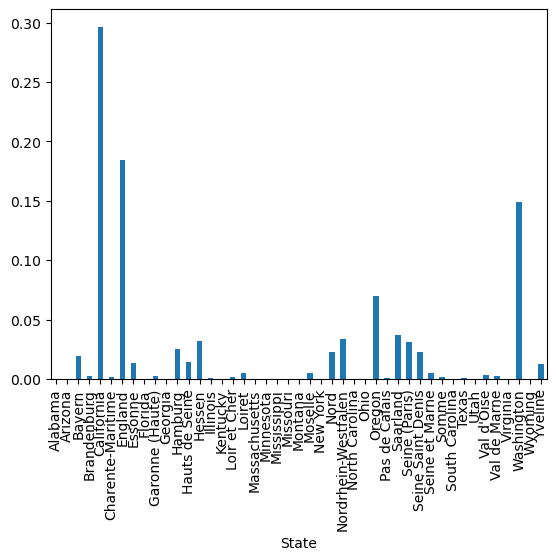

In [12]:
#Visualizing the frequency of State

copy = df_cat.copy()

fq = (copy.groupby("State").size()) / len(copy)
copy["State encode"] = copy["State"].apply(lambda x : fq[x])
copy = copy.drop(['State'], axis=1)
fq.plot.bar(stacked=True)
plt.show()

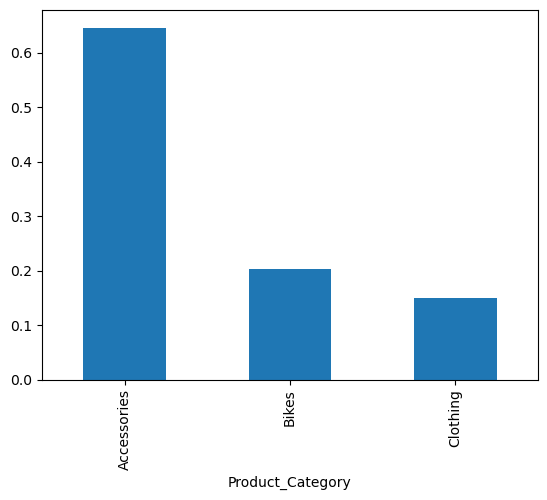

In [13]:
#Visualizing the frequency of Product Category

copy = df_cat.copy()

fq = (copy.groupby("Product_Category").size()) / len(copy)
copy["Product Category encode"] = copy["Product_Category"].apply(lambda x : fq[x])
copy = copy.drop(['Product_Category'], axis=1)
fq.plot.bar(stacked=True)
plt.show()

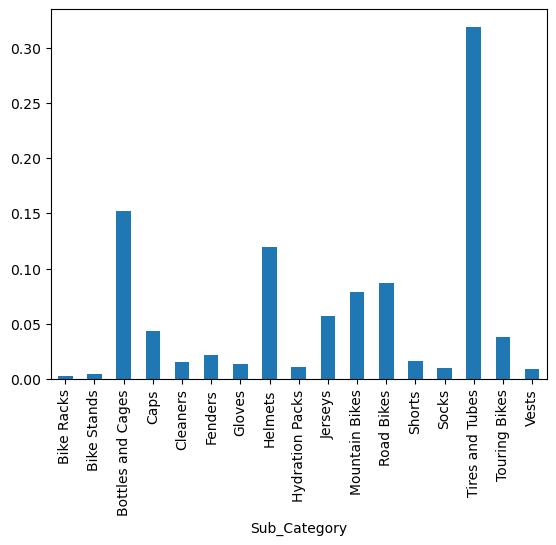

In [14]:
#Visualizing the frequency of (Product) Sub Category

copy = df_cat.copy()


fq = (copy.groupby("Sub_Category").size()) / len(copy)
copy["Sub Category encode"] = copy["Sub_Category"].apply(lambda x : fq[x])
copy = copy.drop(['Sub_Category'], axis=1)
fq.plot.bar(stacked=True)
plt.show()

In [15]:
#performing Chi Square Independence Test between Country and Sub Category
#https://enjoymachinelearning.com/blog/chi-square-test-independence-python/?expand_article=1

compare = pd.crosstab(df_cat['Country'],df_cat['Sub_Category'])
chi2, p, dof, ex = stats.chi2_contingency(compare)
print(f'Chi_square value {chi2}, p value {p}, degrees of freedom {dof}, expected {ex}')

#Since the p-value < 0.05, the Country and Sub Category are not independent so we can cluster them

Chi_square value 699.0365346432127, p value 2.1034262221572546e-116, degrees of freedom 48, expected [[  15.26713704   21.49257156  784.84942351  224.8567659    80.78242414
   112.94716916   71.14782309  618.98606092   58.69695405  296.44926289
   405.69081627  447.93483623   83.8951414    53.95376585 1647.07210463
   197.73165835   46.24608501]
 [  15.36462456   21.62981128  789.86103941  226.2925773    81.29825618
   113.66838754   71.60213388  622.93856479   59.07176045  298.34222452
   408.28133425  450.79510124   84.43084954   54.29828486 1657.58939941
   198.99426375   46.54138702]
 [  18.96870877   26.70352206  975.13896059  279.37408937  100.36841049
   140.33161246   88.39786612  769.06143521   72.92823955  368.32444215
   504.05199908  556.53823209  104.23581713   67.03504847 2046.41060059
   245.67240291   57.45861298]
 [  53.39952963   75.17409511 2745.15057649  786.47656743  282.5509092
   395.05283084  248.85217691 2165.01393908  205.30304595 1036.88407044
  1418.9758504 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 125657.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 125657.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 125657.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 125657.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 125657.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1181, cost: 108767.0
Run 1, iteration: 2/100, moves: 0, cost: 108767.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3931, cost: 112284.0
Run 2, itera

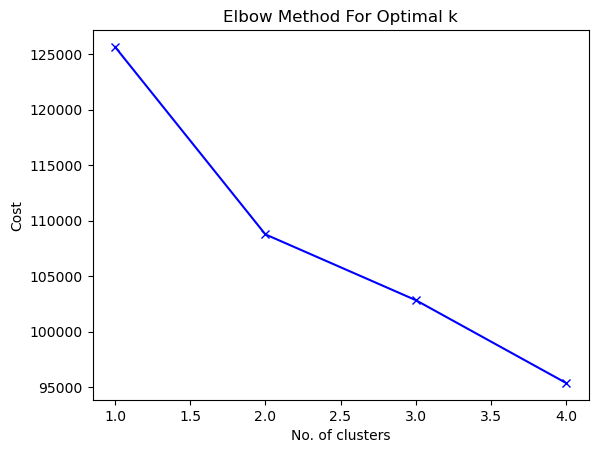

In [16]:
#Finding optimal number of clusters for Categorical Data
#https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/ 

cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_cat)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
#Training model with optimal number of clusters

kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_cat)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3448, cost: 107147.0
Run 1, iteration: 2/100, moves: 1987, cost: 107147.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2053, cost: 99179.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9938, cost: 102349.0
Run 3, iteration: 2/100, moves: 8, cost: 102349.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 7286, cost: 108653.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 12931, cost: 99316.0
Run 5, iteration: 2/100, moves: 4342, cost: 99316.0
Best run was number 2


array([2, 2, 2, ..., 1, 1, 1], dtype=uint16)

In [18]:
#adding cluster to categorical data table
df_cat = df[["Month","Gender","Country","State","Product_Category","Sub_Category"]]
df_cat.insert(0, "Cluster", clusters, True)
df_cat.head()

Cluster     Month Gender        Country       State Product_Category  \
0        2  February      F  United States  Washington      Accessories   
1        2  February      F  United States  Washington         Clothing   
2        2  February      F  United States  Washington      Accessories   
3        2     March      F  United States  Washington      Accessories   
4        2     March      F  United States  Washington      Accessories   

      Sub_Category  
0  Tires and Tubes  
1           Gloves  
2  Tires and Tubes  
3  Tires and Tubes  
4  Tires and Tubes

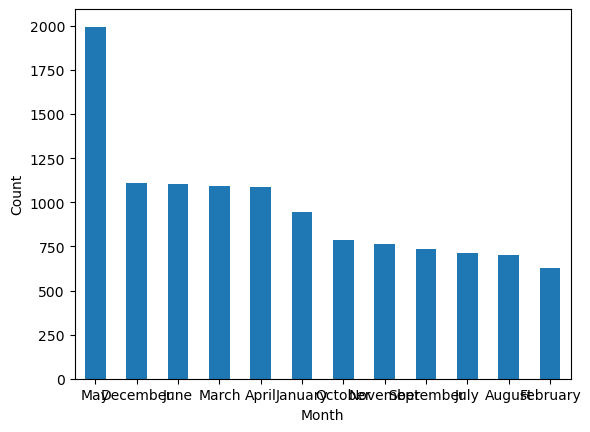

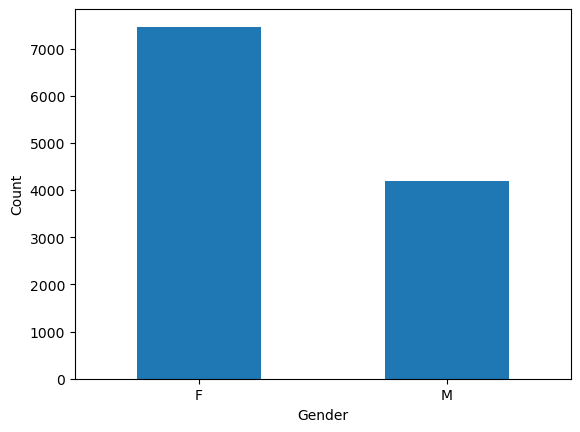

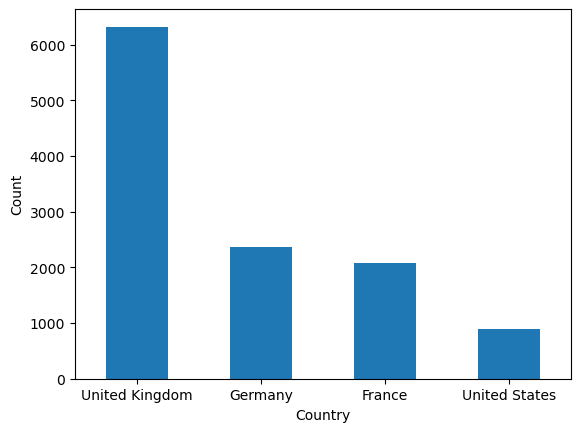

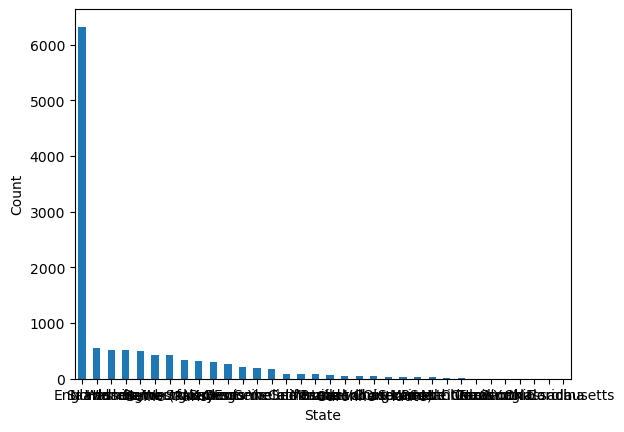

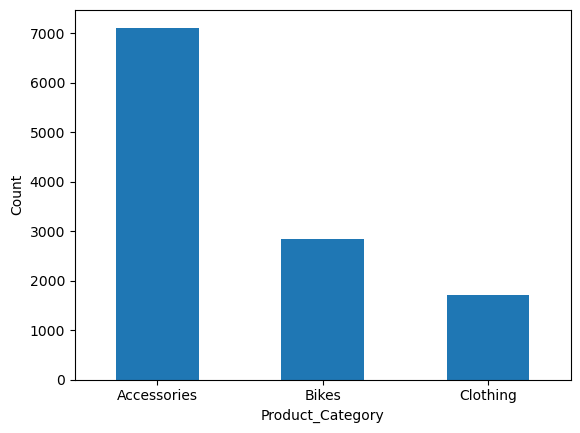

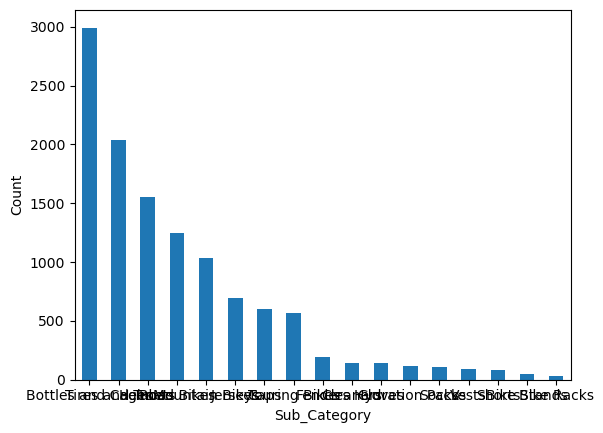

Month  Gender  Country  State
Product_Category Sub_Category                                    
Accessories      Bottles and Cages   2994    2994     2994   2994
                 Tires and Tubes     2042    2042     2042   2042
                 Helmets             1551    1551     1551   1551
Bikes            Road Bikes          1247    1247     1247   1247
                 Mountain Bikes      1031    1031     1031   1031
Clothing         Jerseys              694     694      694    694
                 Caps                 602     602      602    602
Bikes            Touring Bikes        563     563      563    563
Accessories      Fenders              191     191      191    191
                 Cleaners             142     142      142    142
Clothing         Gloves               142     142      142    142
Accessories      Hydration Packs      113     113      113    113
Clothing         Socks                103     103      103    103
                 Vests                 89      89       89     89
                 Shorts                79      79       79     79
Accessories      Bike Stands           51      51       51     51
                 Bike Racks            31      31       31     31

In [19]:
#creating dataframe for each cluster and making bar charts for the categories in them

cluster_0 = df_cat.loc[df_cat["Cluster"]==0].drop(["Cluster"],axis=1)
for col in cluster_0:
    cluster_0[col].value_counts().plot(kind='bar', xlabel=col, ylabel='Count', rot=0)
    plt.show()
cluster_0.groupby(["Product_Category", "Sub_Category"]).count().sort_values(by=['Month'], ascending=False)

#In cluster 0, we can see that the most popular product under Bikes, Sub Category Mountain Bikes.
#This is the most popular category among women in the United States, buying mainly in November.

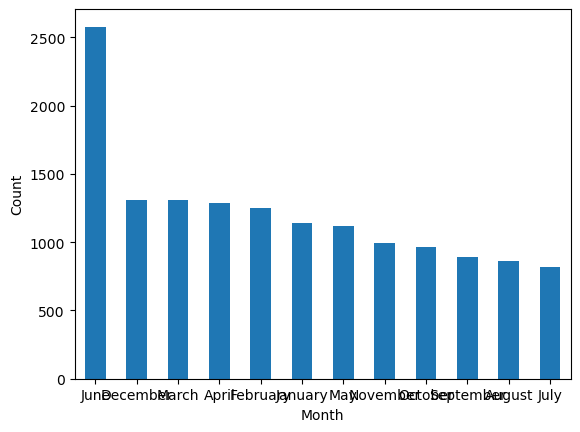

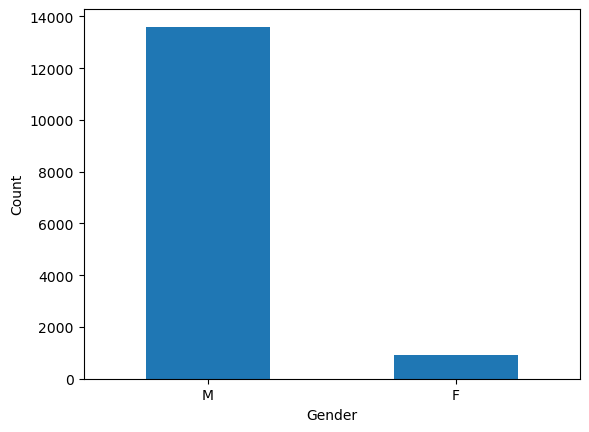

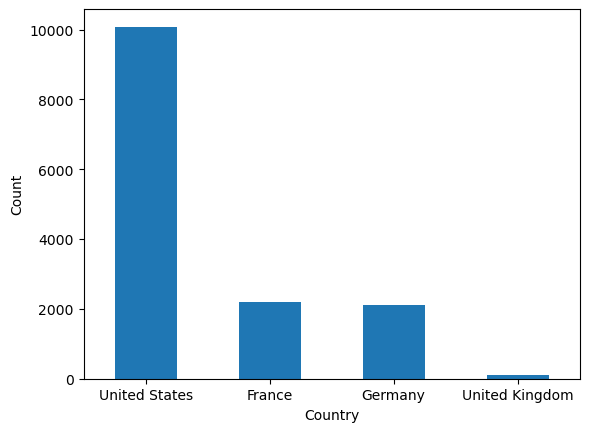

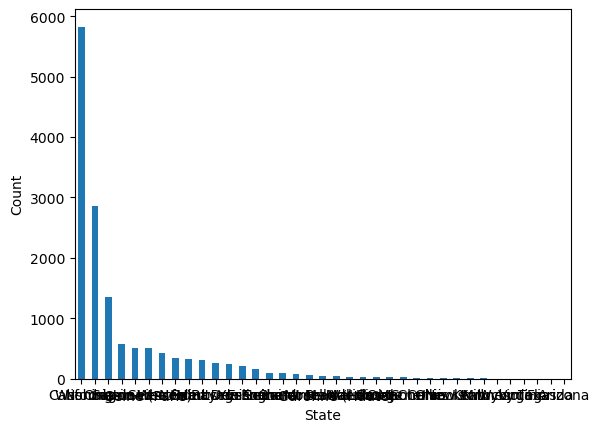

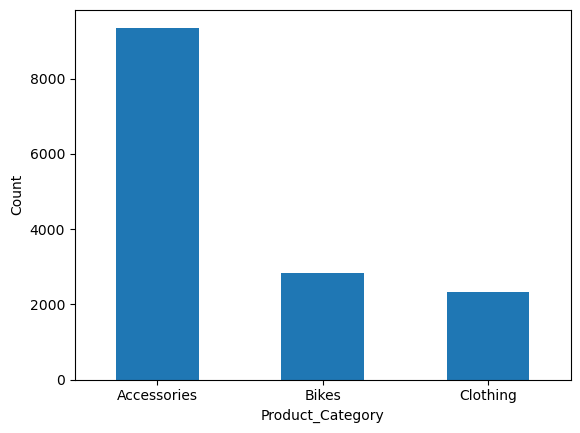

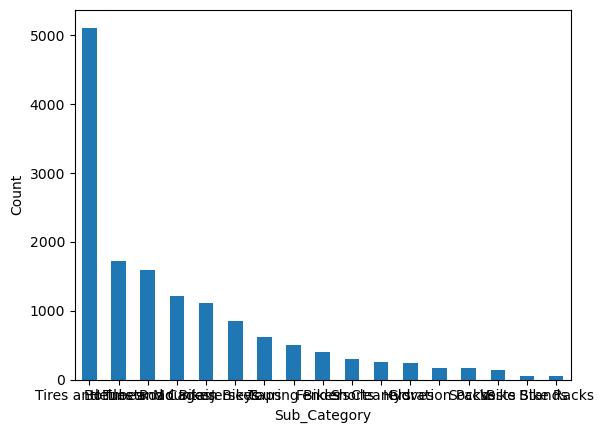

Month  Gender  Country  State
Product_Category Sub_Category                                    
Accessories      Tires and Tubes     5113    5113     5113   5113
                 Helmets             1724    1724     1724   1724
                 Bottles and Cages   1588    1588     1588   1588
Bikes            Road Bikes          1219    1219     1219   1219
                 Mountain Bikes      1108    1108     1108   1108
Clothing         Jerseys              858     858      858    858
                 Caps                 622     622      622    622
Bikes            Touring Bikes        506     506      506    506
Accessories      Fenders              403     403      403    403
Clothing         Shorts               292     292      292    292
Accessories      Cleaners             252     252      252    252
Clothing         Gloves               243     243      243    243
Accessories      Hydration Packs      174     174      174    174
Clothing         Socks                163     163      163    163
                 Vests                145     145      145    145
Accessories      Bike Stands           51      51       51     51
                 Bike Racks            48      48       48     48

In [20]:
cluster_1 = df_cat.loc[df_cat["Cluster"]==1].drop(["Cluster"],axis=1)
for col in cluster_1:
    cluster_1[col].value_counts().plot(kind='bar', xlabel=col, ylabel='Count', rot=0)
    plt.show()
cluster_1.groupby(["Product_Category", "Sub_Category"]).count().sort_values(by=['Month'], ascending=False)

#In cluster 1, we can see that the most popular product under Accessories, Sub Category Tires and Tubes.
#This is the most popular category among men in the United Kingdom, buying mainly in December.

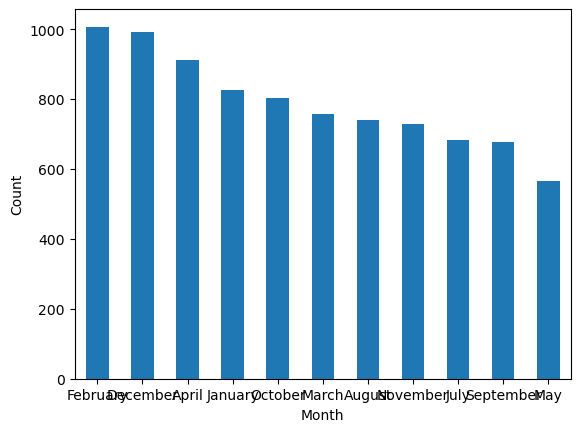

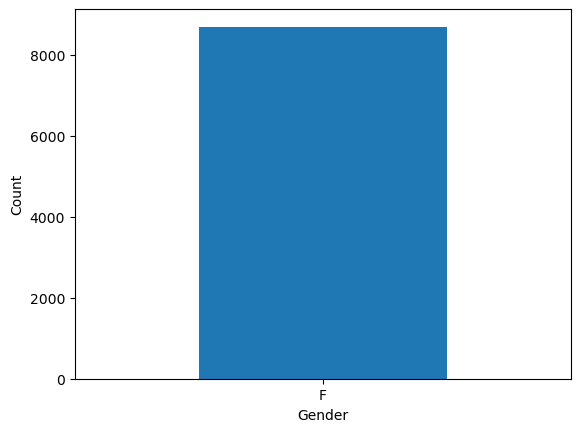

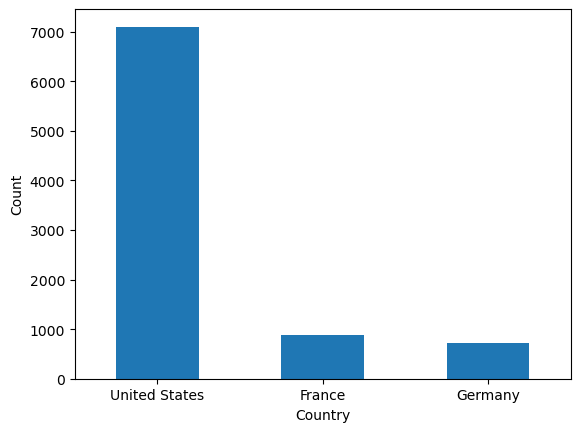

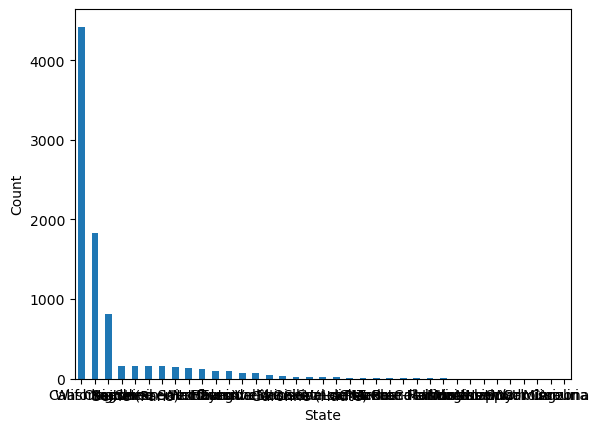

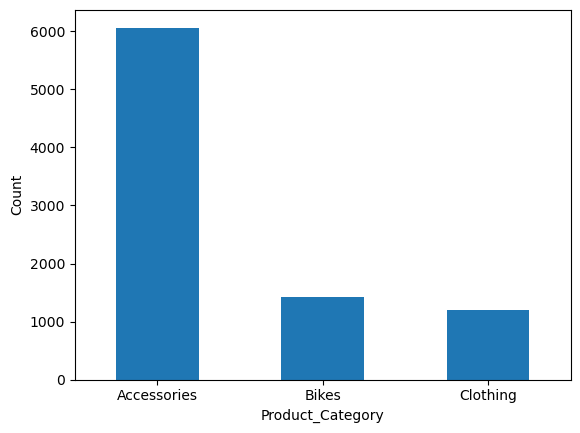

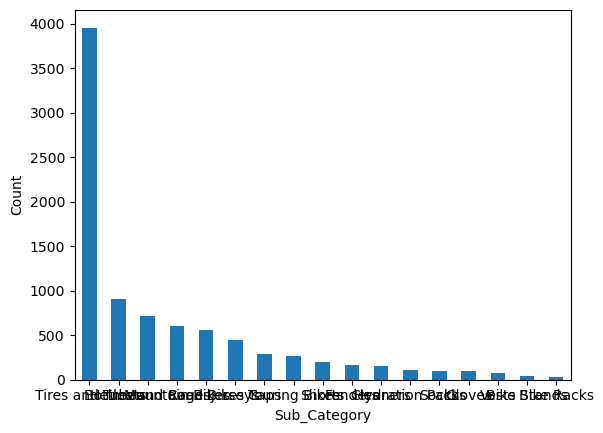

Month  Gender  Country  State
Product_Category Sub_Category                                    
Accessories      Tires and Tubes     3957    3957     3957   3957
                 Helmets              901     901      901    901
                 Bottles and Cages    713     713      713    713
Bikes            Mountain Bikes       598     598      598    598
                 Road Bikes           556     556      556    556
Clothing         Jerseys              448     448      448    448
                 Caps                 293     293      293    293
Bikes            Touring Bikes        265     265      265    265
Clothing         Shorts               195     195      195    195
Accessories      Fenders              168     168      168    168
                 Cleaners             151     151      151    151
                 Hydration Packs      109     109      109    109
Clothing         Socks                 98      98       98     98
                 Gloves                95      95       95     95
                 Vests                 78      78       78     78
Accessories      Bike Stands           43      43       43     43
                 Bike Racks            24      24       24     24

In [21]:
cluster_2 = df_cat.loc[df_cat["Cluster"]==2].drop(["Cluster"],axis=1)
for col in cluster_2:
    cluster_2[col].value_counts().plot(kind='bar', xlabel=col, ylabel='Count', rot=0)
    plt.show()
cluster_2.groupby(["Product_Category", "Sub_Category"]).count().sort_values(by=['Month'], ascending=False)

#In cluster 2, we can see that the most popular product under Accessories, Sub Category Tires and Tubes.
#This is the most popular category among women in the United Kingdom, buying mainly in June.

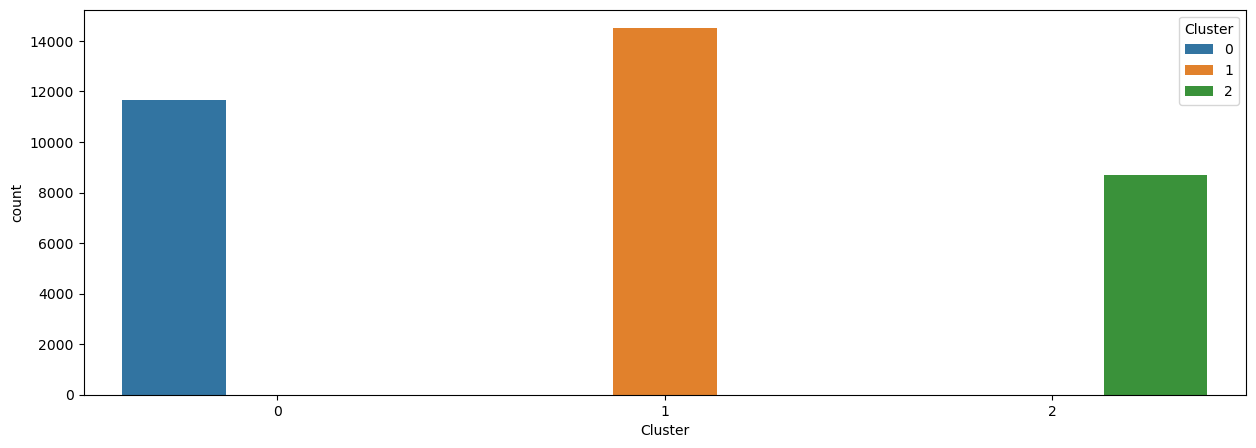

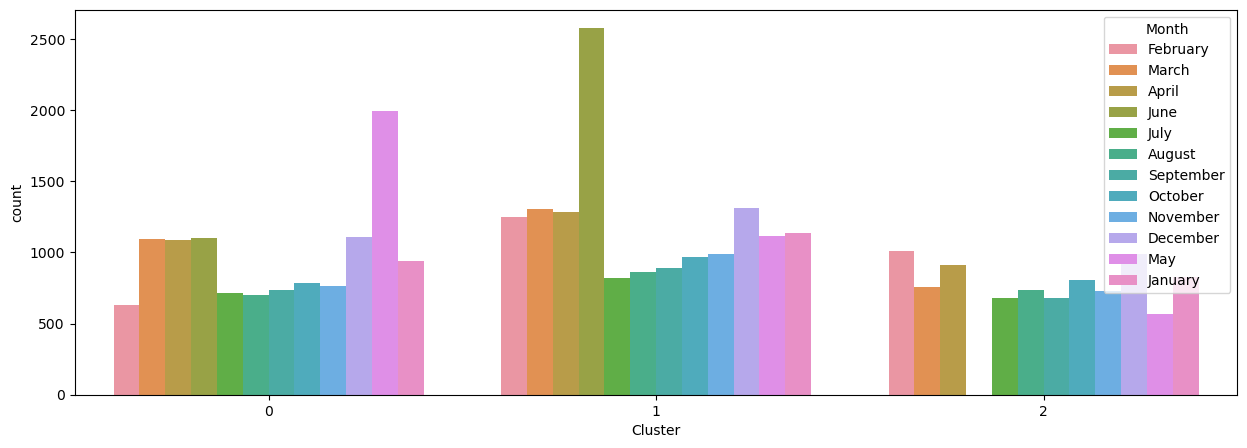

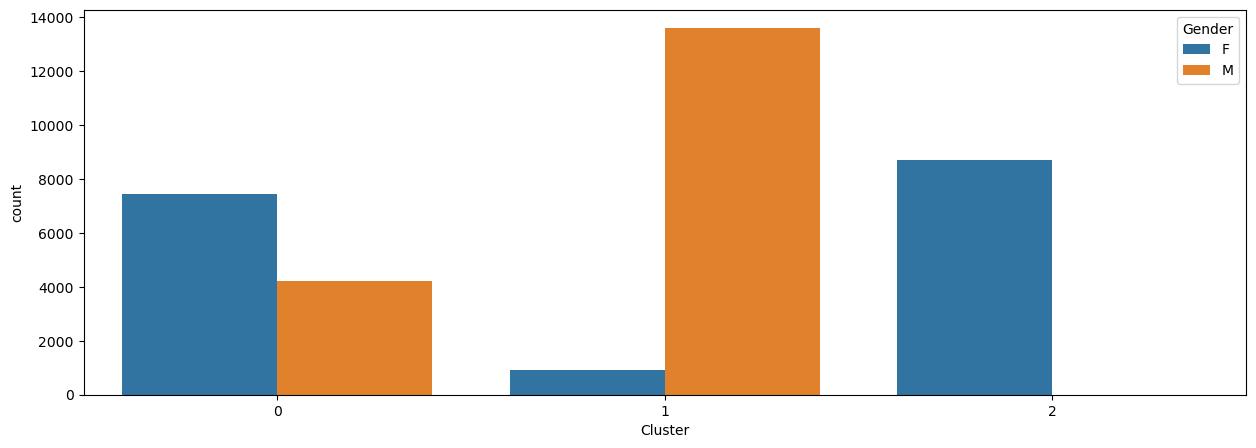

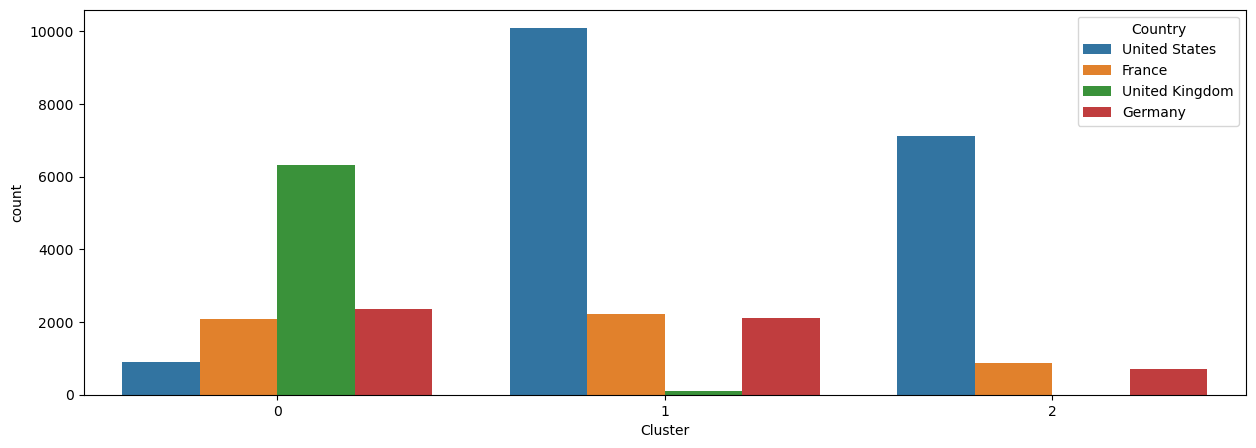

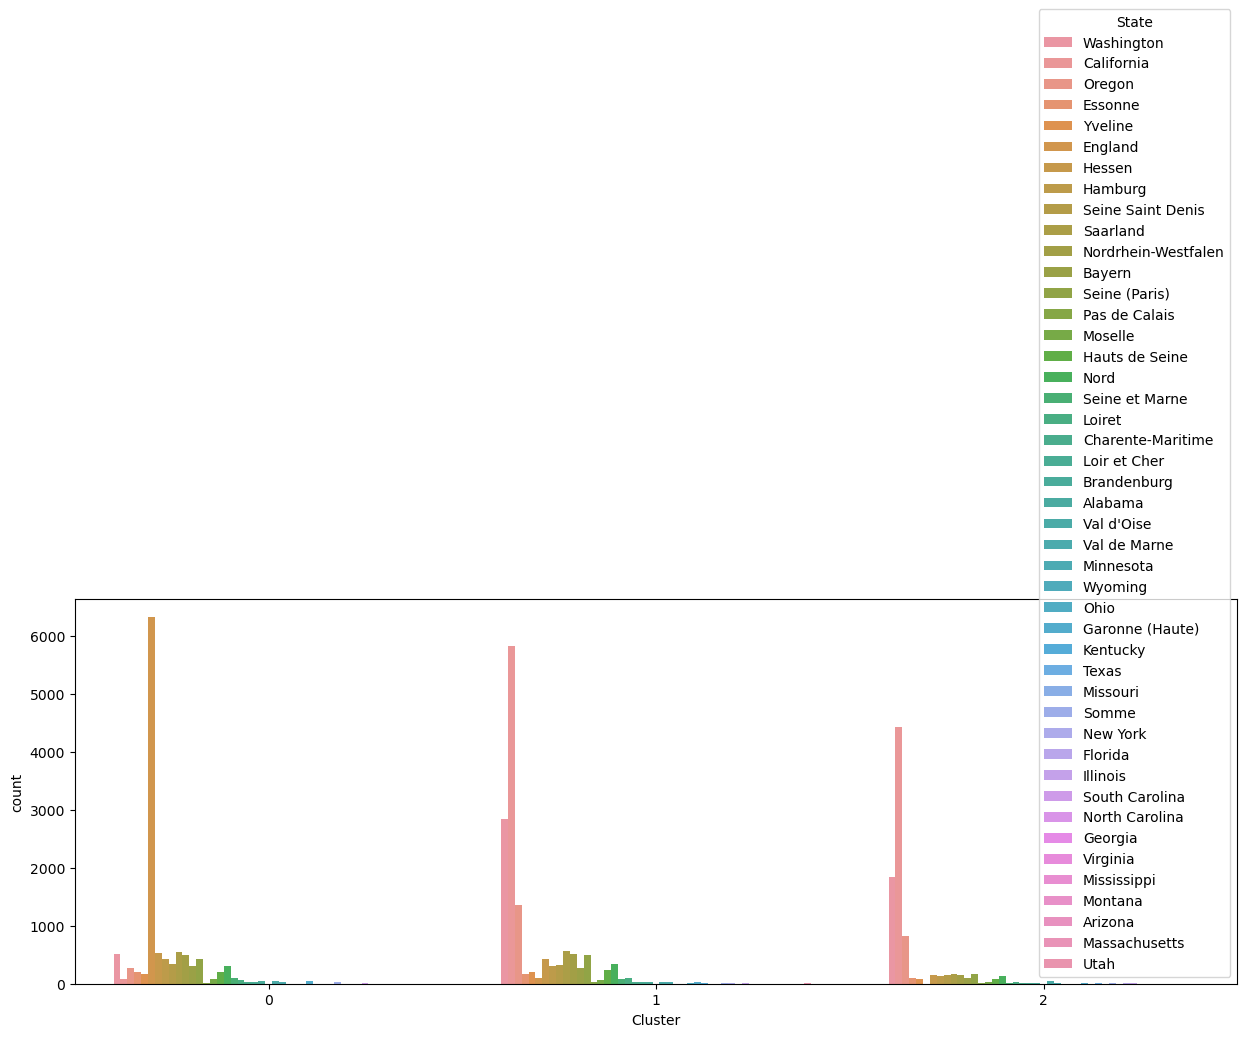

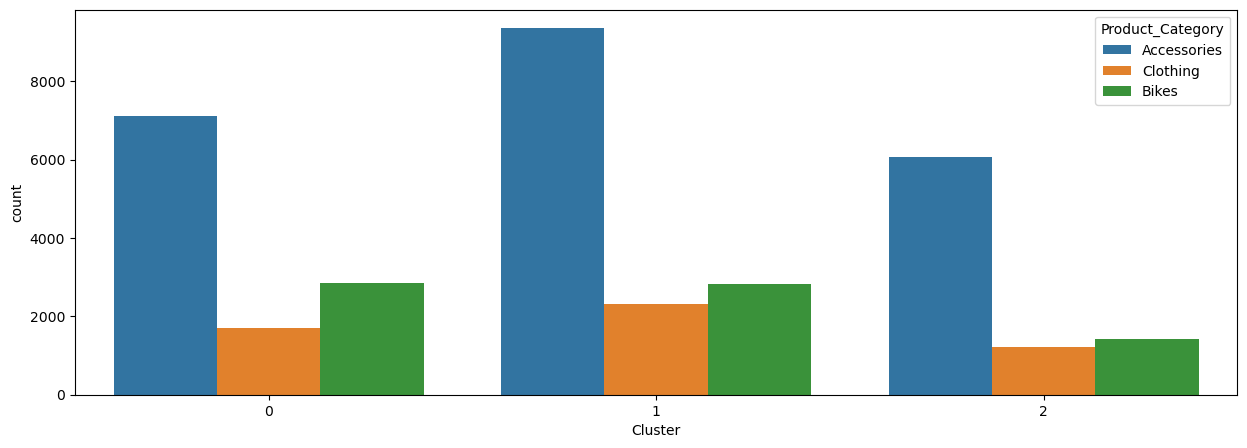

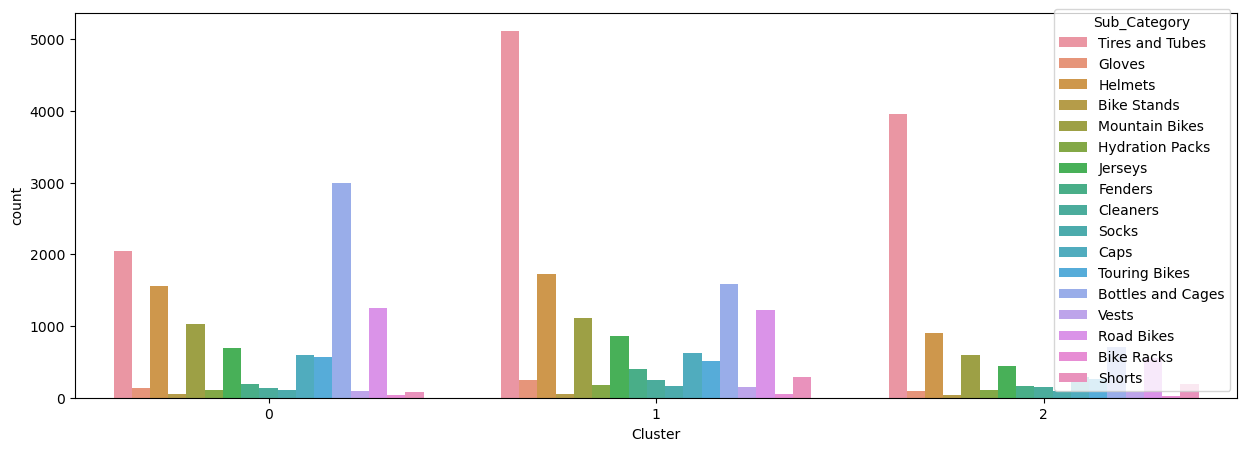

In [22]:
#making bar charts for clusters in each category

for col in df_cat:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = df_cat)
    plt.show()

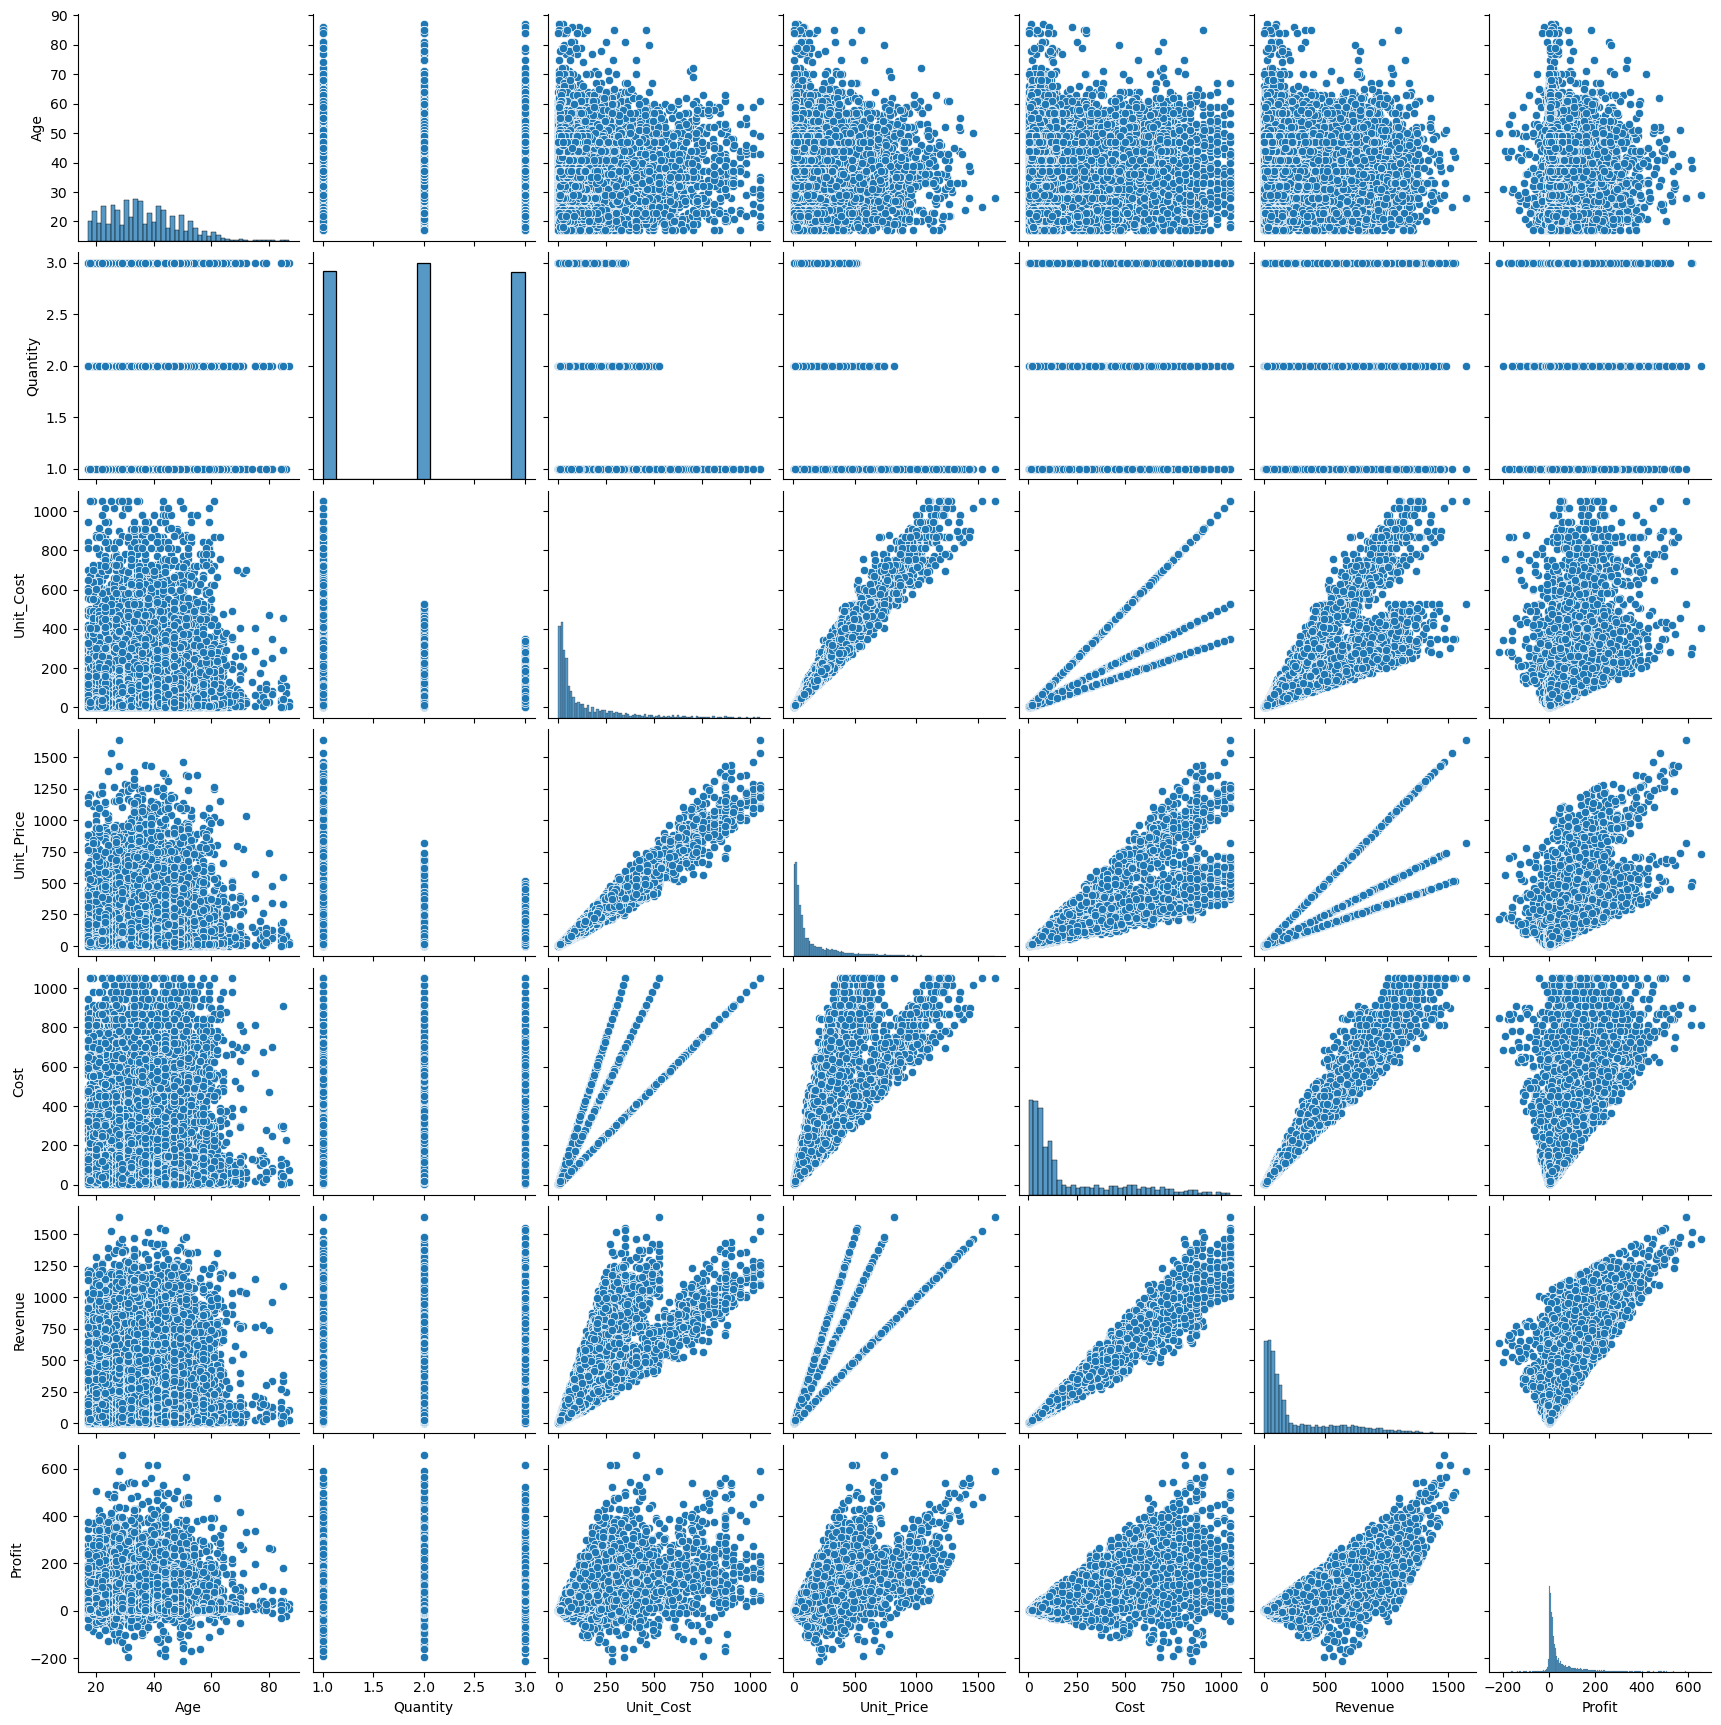

In [24]:
sc = df.loc[df['Sub_Category'] == "Tires and Tubes"]
sns.pairplot(data=sc)

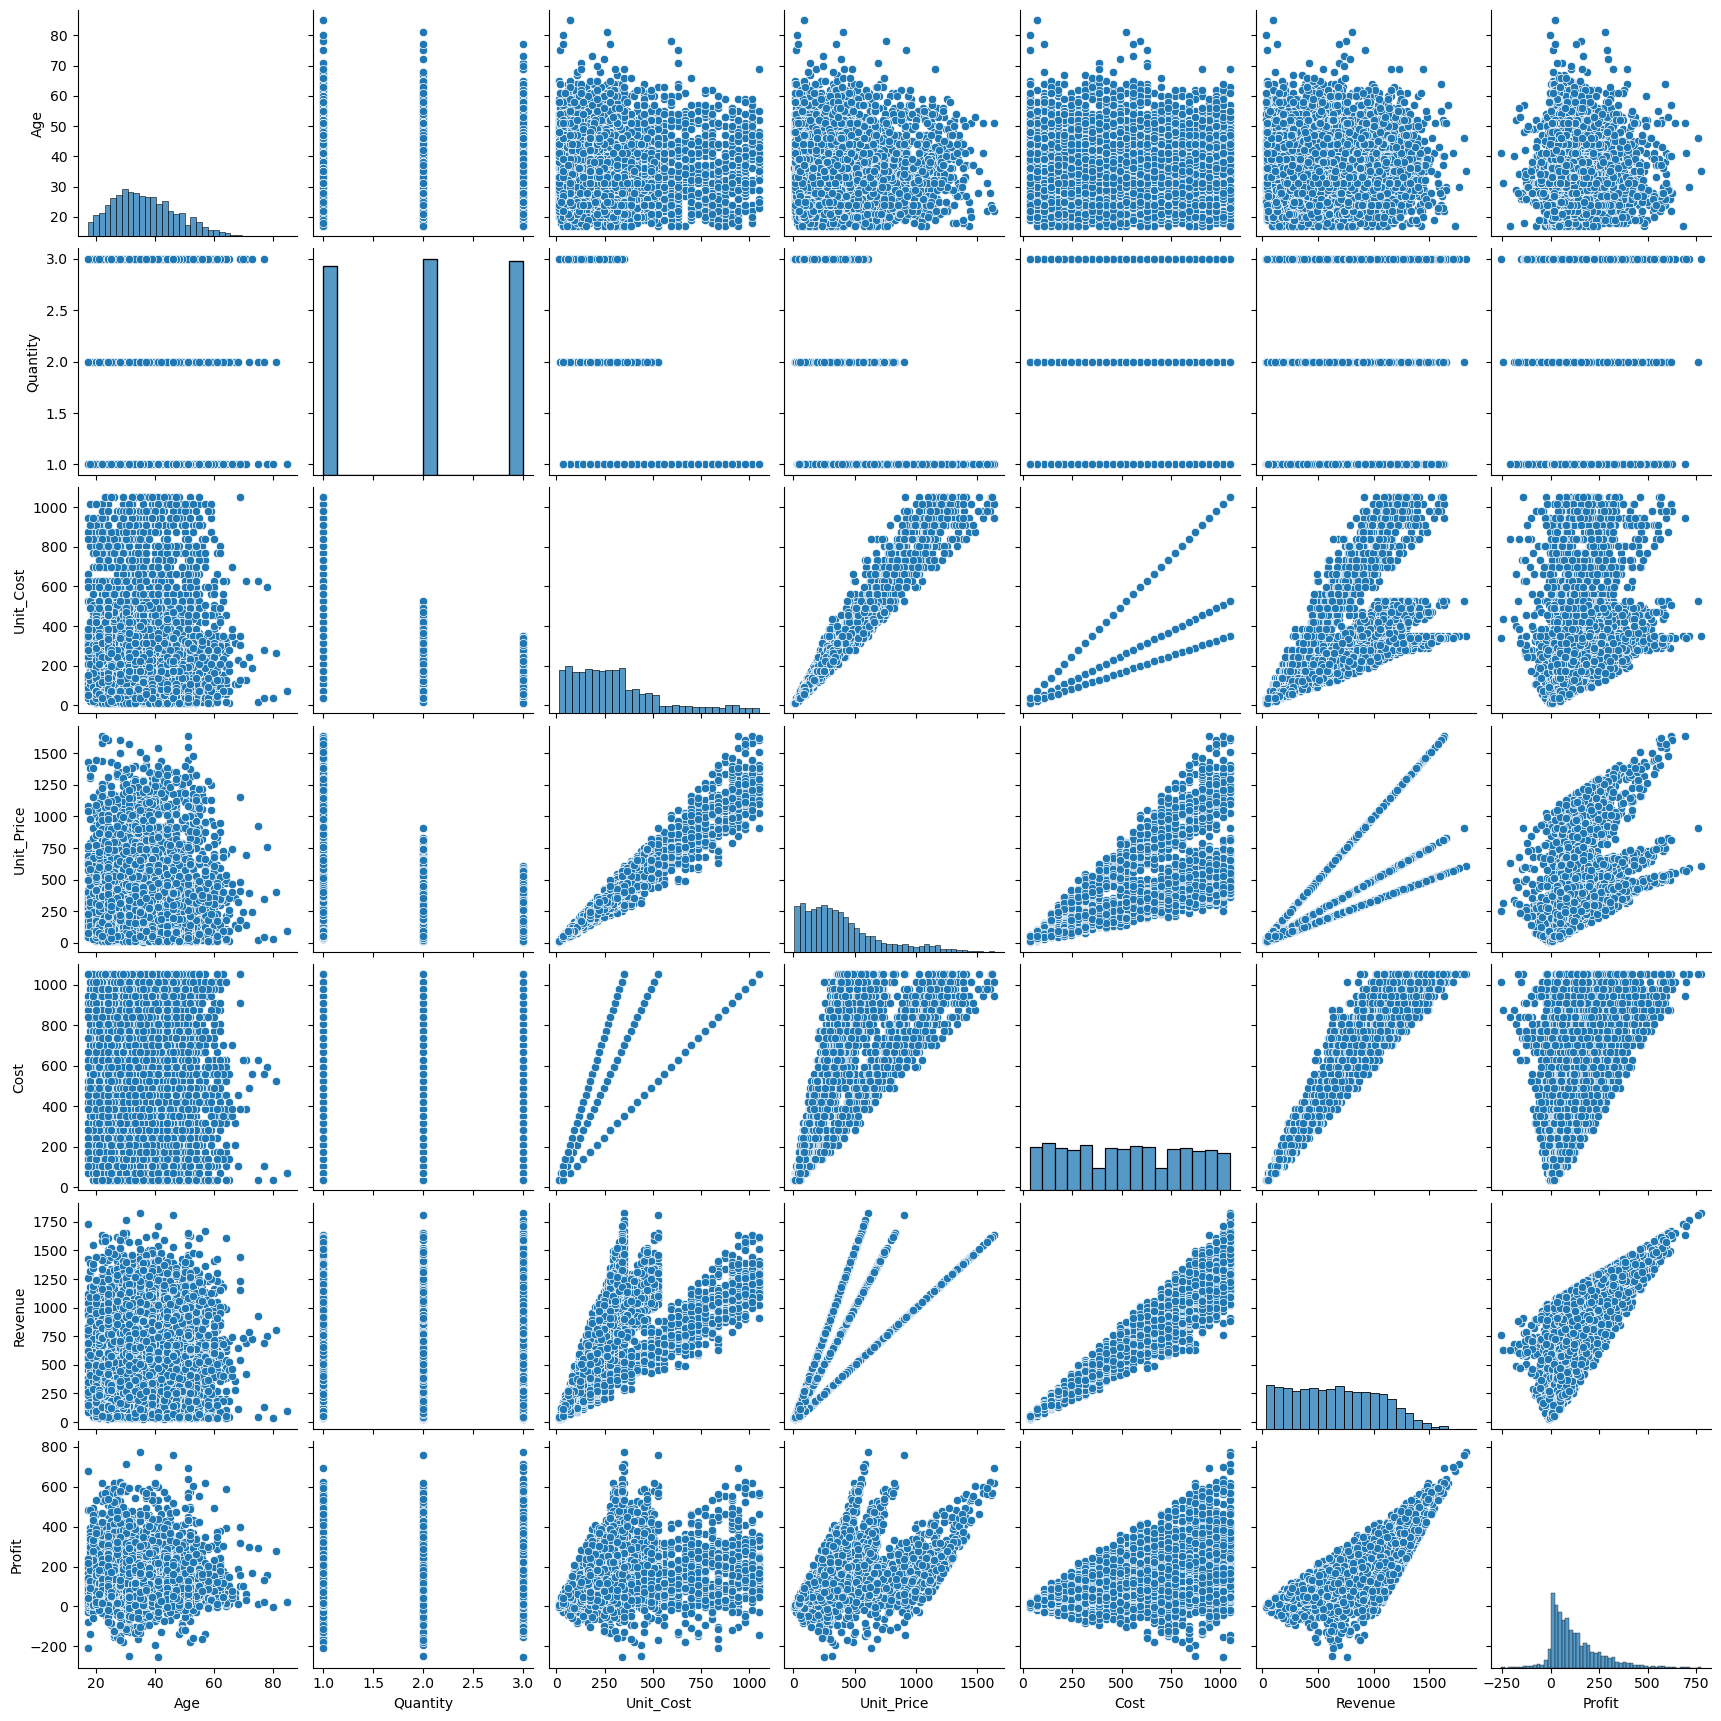

In [25]:
sc = df.loc[df['Sub_Category'] == "Helmets"]
sns.pairplot(data=sc)

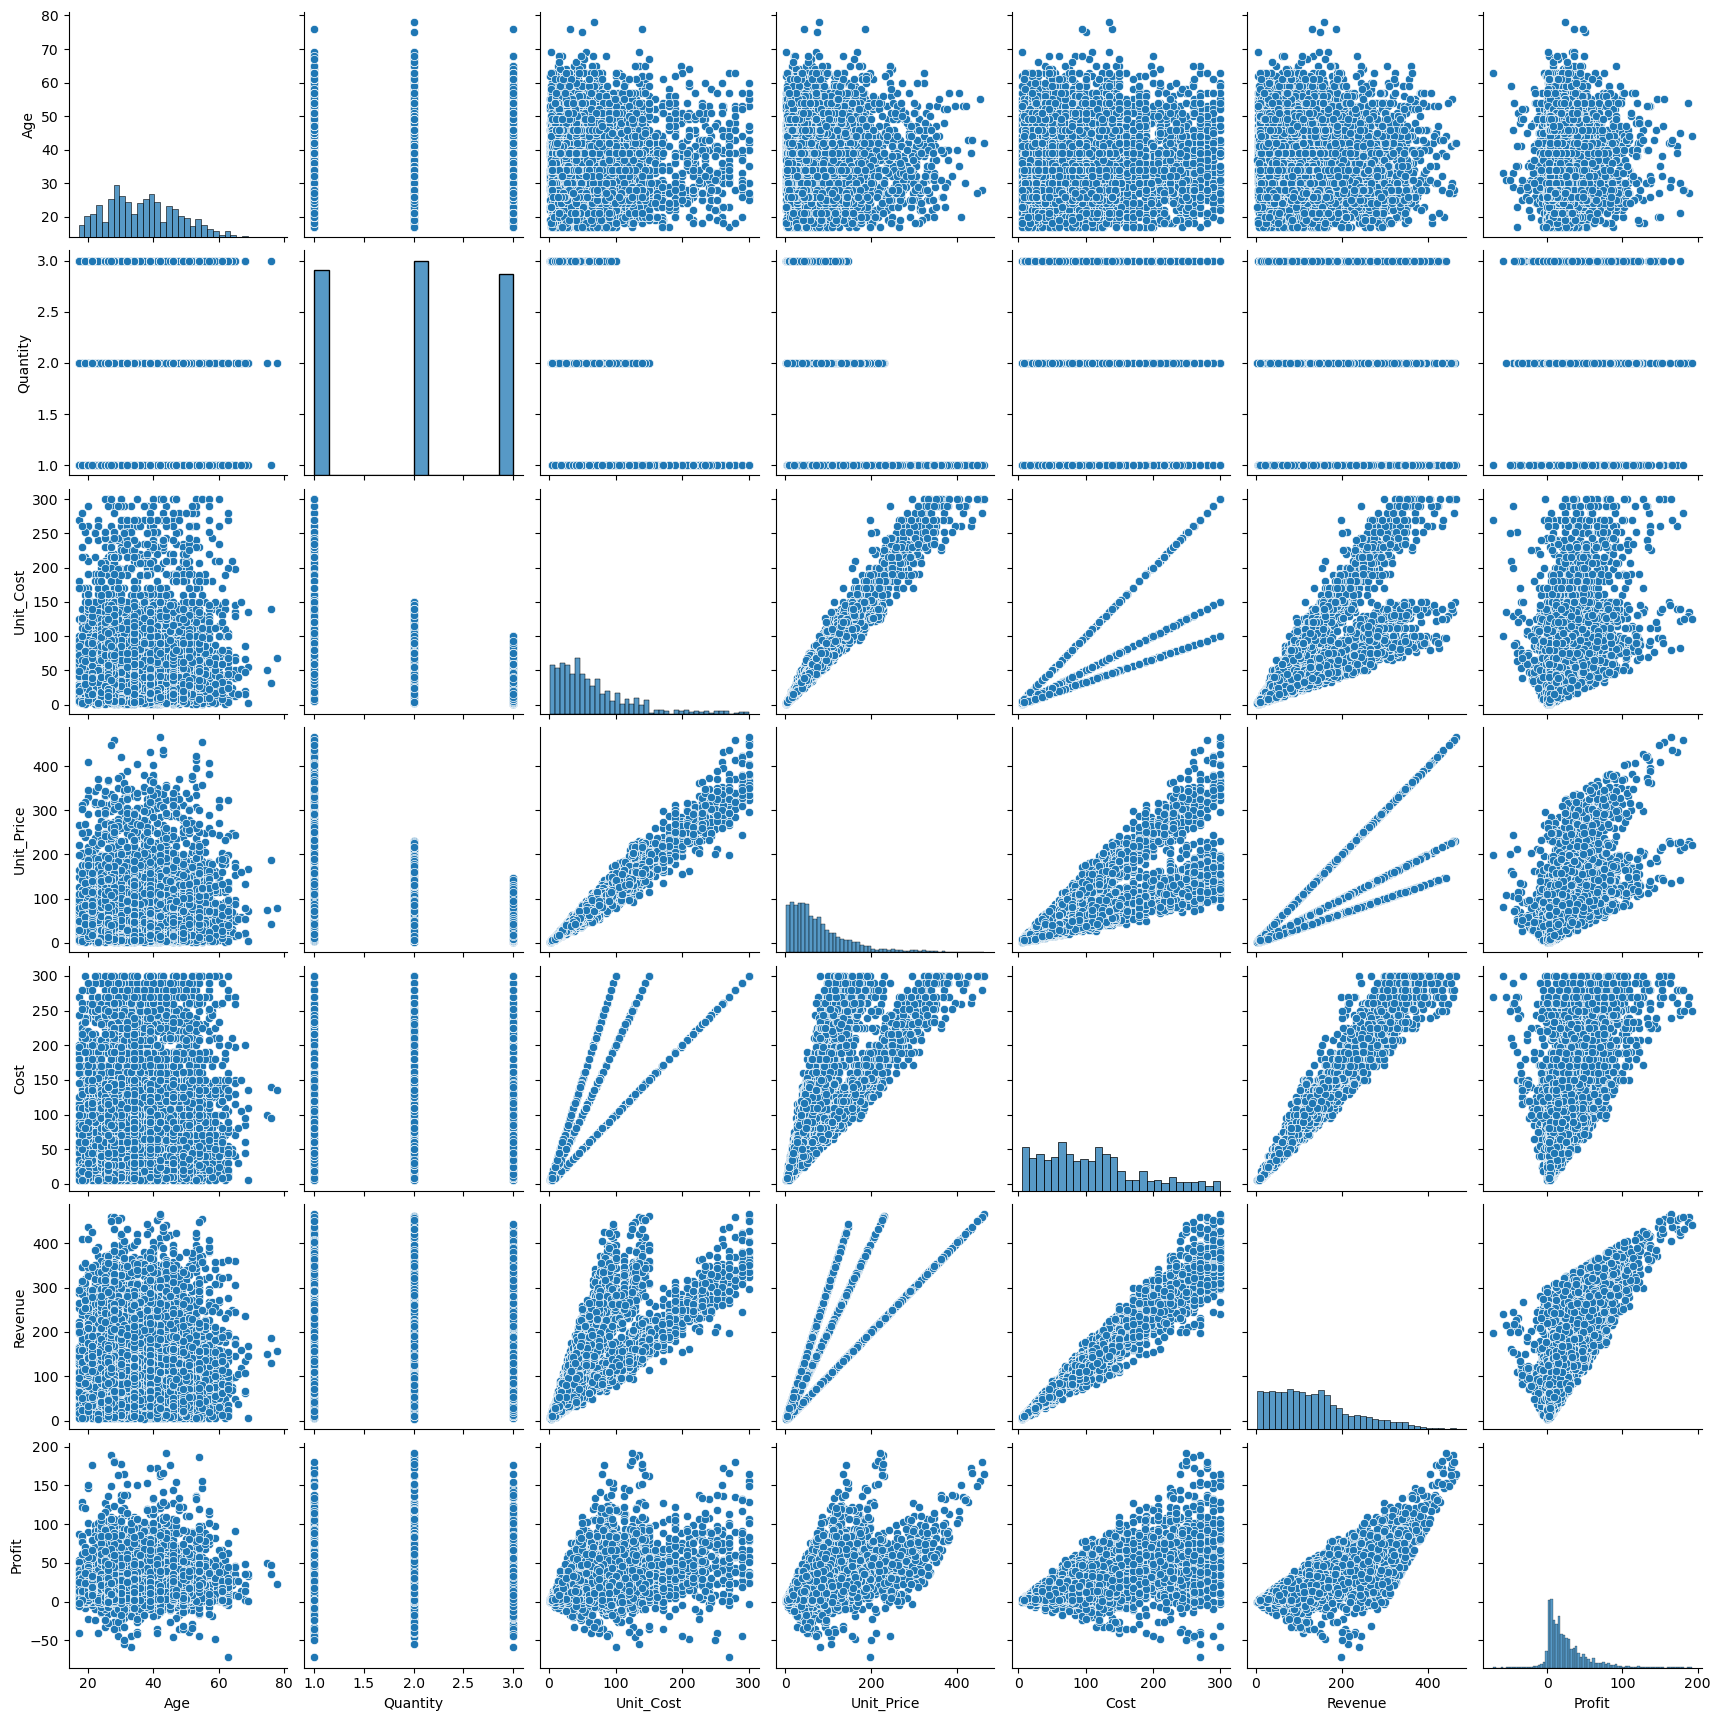

In [26]:
sc = df.loc[df['Sub_Category'] == "Bottles and Cages"]
sns.pairplot(data=sc)

In [ ]:
#It seems that the different subcategories have the same underlying distribution as the overall line plots

In [53]:
#creating a table with only age, gender, and profit
#https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
new_data = df[["Age","Gender","Profit"]]
new_data = new_data[(new_data.Age >= 23) & (new_data.Age <= 52)]
new_data['Gender'] = labelencoder.fit_transform(new_data['Gender'])

/Users/akanksharoy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/akanksharoy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/akanksharoy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/akanksharoy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

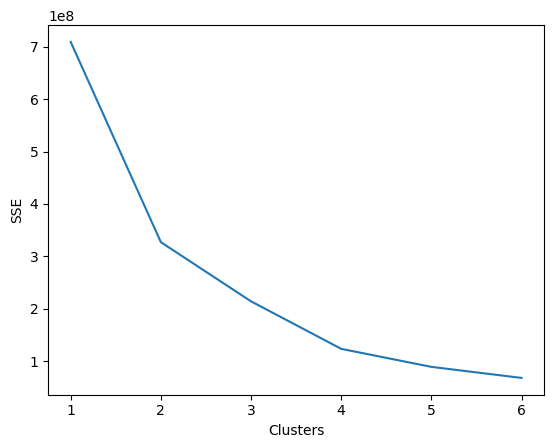

In [54]:
#finding optimal number of clusters
#https://medium.com/@sk.shravan00/k-means-for-3-variables-260d20849730

wcss = []
for i in range(1,7):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(new_data)
    wcss.append(k_means.inertia_)
    
#plot elbow curve
plt.plot(np.arange(1,7),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [55]:
#finding cluster number for each data point and adding it to the dataframe
k_means_optimum = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(new_data)
new_data['cluster'] = y  
new_data

/Users/akanksharoy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Age  Gender  Profit  cluster
0      29.0       0    29.0        2
1      29.0       0     8.0        2
2      29.0       0     4.0        2
3      29.0       0    58.0        2
4      29.0       0    20.0        2
...     ...     ...     ...      ...
34861  38.0       1  -562.0        0
34862  38.0       1  -349.0        0
34863  38.0       1  -466.0        0
34864  38.0       1  -367.0        0
34865  38.0       1  -752.0        0

[28267 rows x 4 columns]

In [56]:
data0 = new_data[new_data.cluster==0]
data1 = new_data[new_data.cluster==1]
data2 = new_data[new_data.cluster==2]
data3 = new_data[new_data.cluster==3]

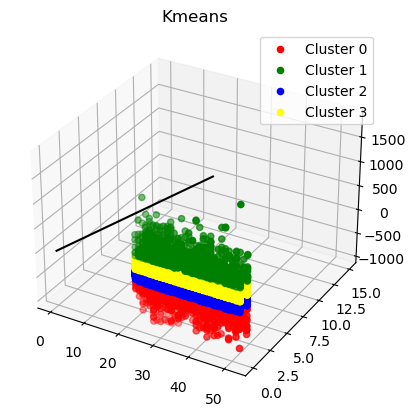

In [57]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data0.Age, data0.Gender, data0.Profit, c='red', label = 'Cluster 0')
kplot.scatter3D(data1.Age, data1.Gender, data1.Profit, c='green', label = 'Cluster 1')
kplot.scatter3D(data2.Age, data2.Gender, data2.Profit, c='blue', label = 'Cluster 2')
kplot.scatter3D(data3.Age, data3.Gender, data3.Profit, c='yellow', label = 'Cluster 3')
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()

In [58]:
#determining the silhouette score
from sklearn.metrics import silhouette_score
score = silhouette_score(new_data,y)
print(score)

#it is on the higher side so the samples in the clusters are similar to each other 

0.6656119566655219


In [61]:
data1.groupby(['Gender']).mean()
#grouping by gender to see how it affects profit
#not a huge difference, but women are slightly more profitable customers

Age      Profit  cluster
Gender                                
0       36.267361  564.633681      1.0
1       35.994975  574.629816      1.0

In [62]:
data1.groupby(['Age']).mean().sort_values(by=['Profit'], ascending=False)
#It seems that the most profitable age groups are the middle aged and older young adults

Gender      Profit  cluster
Age                                
50.0  0.285714  658.785714      1.0
23.0  0.500000  646.000000      1.0
46.0  0.437500  640.906250      1.0
42.0  0.521739  618.000000      1.0
26.0  0.529412  616.352941      1.0
31.0  0.519231  601.750000      1.0
45.0  0.580645  583.741935      1.0
27.0  0.500000  580.590909      1.0
36.0  0.652174  580.086957      1.0
35.0  0.431818  579.250000      1.0
30.0  0.555556  578.968254      1.0
25.0  0.644444  574.466667      1.0
51.0  0.545455  573.212121      1.0
47.0  0.350000  572.350000      1.0
38.0  0.526316  571.236842      1.0
39.0  0.510638  568.702128      1.0
40.0  0.650000  567.083333      1.0
44.0  0.315789  565.710526      1.0
24.0  0.488372  565.534884      1.0
49.0  0.388889  563.555556      1.0
41.0  0.491525  561.169492      1.0
48.0  0.681818  559.000000      1.0
28.0  0.463768  557.434783      1.0
52.0  0.642857  544.392857      1.0
43.0  0.312500  540.343750      1.0
29.0  0.418182  538.963636      1.0
34.0  0.547170  538.849057      1.0
33.0  0.615385  534.153846      1.0
37.0  0.500000  524.900000      1.0
32.0  0.461538  515.641026      1.0